In [26]:
import sys
sys.path.append('../')

import random
from helper import *

In [27]:
class stochastic:
    def mse_loss(self, x):
        weights = x[0]
        y_pred = np.dot(self.X, weights)
        mse = np.mean((self.y - y_pred) ** 2)
        return mse

    def mse_loss_grad(self, x):
        # Choose a random data point from the training set
        i = np.random.randint(self.X.shape[0])
        Xi = self.X[i, :]
        yi = self.y[i]

        # Compute the gradient of the MSE loss with respect to x for the chosen data point
        y_pred = np.dot(Xi, x)
        grad = 2 * Xi * (y_pred - yi)

        return grad
    
    def __init__(self, X, y, method = 'mse'):
        self.X = X
        self.y = y
        self.batch_size=1

        if method == 'mse':
            self.f = self.mse_loss 
            self.grad = self.mse_loss_grad
        else:
            print('method not found')
        

    def constant_lr_scheduling(epoch, initial_lr):
        return initial_lr

    def gradient_descent(self, x0, lr_scheduling_func=constant_lr_scheduling, initial_lr=0.01, max_epochs=1000, epsilon=1e-5, minimum = 0.0, apply_min=False):
        """
        Cтохастический градиентный спуск для поиска минимума функции.

        Аргументы:
            x0 (list): Начальную точка, с которой начинается поиск.
            initial_lr (float): learning_rate - Начальная скорость обучения или шаг градиентного спуска.
            max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
            minimum (float): Минимум функции.
            epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        Возвращает:
            Список всех точек, посещенных во время алгоритма.
        """
        return custom_gradient_descent_with_lr_scheduling(self.f, self.grad, x0, lr_scheduling_func, initial_lr, max_epochs, epsilon, minimum, apply_min)
    
    def get_loss_history(self, results):
        loss_history = []

        for i in range(len(results)):
            loss_history.append(self.f(results[i]))

        return loss_history
    


In [28]:
# Генерируем случайные точки
real_weight, real_bias = 2, 0

dots_count = 5000
variance = 0.5
X = np.random.rand(dots_count, 1)
y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)

print(X.shape, y.shape)

sgd = stochastic(X, y)

results = sgd.gradient_descent(np.array([0], float), max_epochs=1000)

(5000, 1) (5000, 1)


Коэффициенты уравнения прямой:
y = 2.000 * x + 0.000
Вычисленные коэффициенты уравнения прямой SGD:
y = 1.997 * x + 0.000


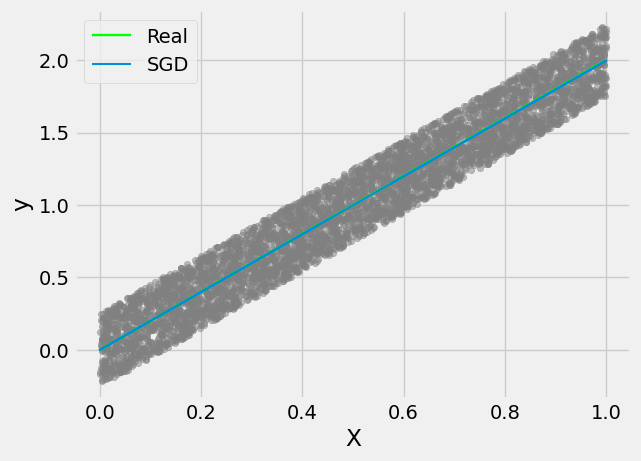

In [29]:
print("Коэффициенты уравнения прямой:")
print(f"y = {real_weight:.3f} * x + {real_bias:.3f}")

plt.scatter(X, y, color='gray', alpha=0.5, s=20.8)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, real_weight * X + real_bias, label='Real', color='lime', linewidth=1.7)

plt.plot(X, results[-1][0] * X + real_bias, label='SGD', linewidth=1.5)
print("Вычисленные коэффициенты уравнения прямой SGD:")
print(f"y = {results[-1][0]:.3f} * x + {real_bias:.3f}")

plt.legend()
plt.show()

Значение функции потерь:
real = 0.020873019729422522
SGD = 0.020869912461904182
diff = -3.107267518339535e-06



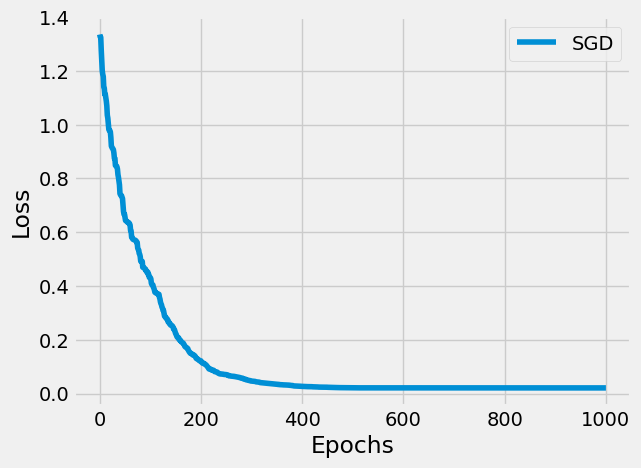

In [30]:
loss_history = sgd.get_loss_history(results)
loss_real = sgd.get_loss_history([[real_weight]])[-1]

plt.plot(loss_history, label="SGD")
print("Значение функции потерь:")
print(f"real = {loss_real}")
print(f"SGD = {loss_history[-1]}")
print(f"diff = {loss_history[-1] - loss_real}\n")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()